In [39]:
#pip install xverse

In [40]:
#pip install xgboost

In [172]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

"xargs" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [169]:
pip install swig

Note: you may need to restart the kernel to use updated packages.
  ERROR: Could not find a version that satisfies the requirement swig (from versions: none)
ERROR: No matching distribution found for swig


In [170]:
conda install gxx_linux-64 gcc_linux-64 swig

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.

PackagesNotFoundError: The following packages are not available from current channels:

  - gcc_linux-64
  - gxx_linux-64

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [171]:
pip install auto-sklearn

  Using cached https://files.pythonhosted.org/packages/ec/33/670d1074e349c3e501458a8a7072e38b57a89eb720b6768972ae7106e608/auto-sklearn-0.6.0.tar.gz
Note: you may need to restart the kernel to use updated packages.
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\sanar\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sanar\\AppData\\Local\\Temp\\pip-install-b7ja73me\\auto-sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\sanar\\AppData\\Local\\Temp\\pip-install-b7ja73me\\auto-sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\sanar\AppData\Local\Temp\pip-install-b7ja73me\auto-sklearn\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\sanar\AppData\Local\

In [41]:
import pandas as pd
import numpy as np
import os
import glob 
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from xverse.transformer import WOE
from xverse.transformer import MonotonicBinning
from xverse.ensemble import VotingSelector


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




In [42]:
## Funciones Personalizadas

##-------------------------------------------------------------------------------##

## Funciones para valores perdidos.

## Porcentaje de valores perdidos por variable
def resum_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
    return missing_data

## dataFrame de resumen de posición de valores perdidos. 
    
def posmissing(df):
    lista_miss = np.where(df.isna())
    v1 = pd.Series(np.ndarray.tolist(lista_miss[0]))
    v2 = pd.Series(np.ndarray.tolist(lista_miss[1]))
    resumen_vna = pd.concat([v1, v2], axis=1, keys=['posicion_fila', 'posicion_columna'])
    return resumen_vna

In [43]:
# 1. Lee los nombres de archivos del directorio de 
#    trabajo
filenames = glob.glob('Datos/*.csv')

In [44]:
filenames

['Datos\\DatosNegativos1.csv', 'Datos\\DatosPositivos1.csv']

In [45]:
# 2. lee el contenido de los archivos .xlsx
df = pd.DataFrame()
for filename in filenames:
    data = pd.read_csv(filename)
    print(data.shape)
    df = df.append(data)

(5561, 1760)
(8322, 1761)


In [46]:
df.shape

(13883, 1761)

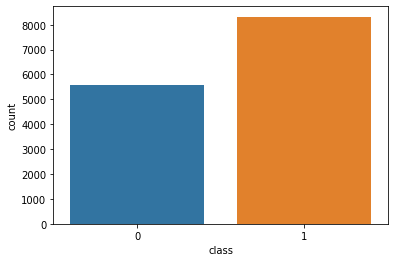

In [47]:
# Contamos los valores por clase, y vemos que la clase está balanceada
sns.countplot(df["class"])

In [48]:
# Eliminamos la columna que ennumera del primer archivo
df_dep = df.drop(columns="Unnamed: 0")

In [49]:
df_dep.head()

,A,AA,AC,AD,AE,AF,AG,AH,AI,AK,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
0,28.571,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.979,0.0,1.895,0.994,0.781,0.0,0.0,0.0
1,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.769,0.0,2.119,0.028,1.000,0.0,0.0,0.0
2,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.844,0.0,0.977,0.096,0.138,0.0,0.0,0.0
3,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.564,0.0,0.504,0.096,0.095,0.0,0.0,0.0
4,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.813,0.0,0.980,0.848,0.065,0.0,0.0,0.0


In [50]:
# Creamos una columna enumerando cada fila
df_dep = df_dep.assign(num=[0 + i for i in range(len(df_dep))])[['num'] + df_dep.columns.tolist()]

In [51]:
df_dep.tail()

,num,A,AA,AC,AD,AE,AF,AG,AH,AI,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
8317,13878,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,3.404,0.0,2.520,3.511,3.691,2.329,0.240,1.653
8318,13879,33.333,0.0,0.0,0.0,0.0,0.0,12.50,0.0,0.0,...,0.0,0.0,1.537,0.0,0.941,1.213,1.282,1.165,0.048,0.000
8319,13880,6.667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,6.170,0.0,4.833,6.313,5.053,2.881,4.180,2.857
8320,13881,5.556,0.0,0.0,0.0,0.0,0.0,5.88,0.0,0.0,...,0.0,0.0,3.430,0.0,6.001,5.297,4.848,4.387,3.797,3.346
8321,13882,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,7.002,0.0,3.670,12.909,11.567,1.463,6.780,12.438


In [52]:
# Guardamos la variables sequence
df_1 = df_dep[["num", "sequence"]]
df_1.tail()

,num,sequence
8317,13878,ILPIIGKILSTIFGK
8318,13879,YAGAVANDL
8319,13880,KKCFRWQWRMKKLGA
8320,13881,GWAGWLLSPRGSRPSWGP
8321,13882,LRRLYKRVVKLWKRLFRQLRRPVR


In [53]:
# Eliminamos la variable sequence del dataframe depurado
df_dep.pop("sequence")
df_dep.head()

,num,A,AA,AC,AD,AE,AF,AG,AH,AI,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
0,0,28.571,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.979,0.0,1.895,0.994,0.781,0.0,0.0,0.0
1,1,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.769,0.0,2.119,0.028,1.000,0.0,0.0,0.0
2,2,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.844,0.0,0.977,0.096,0.138,0.0,0.0,0.0
3,3,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.564,0.0,0.504,0.096,0.095,0.0,0.0,0.0
4,4,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.813,0.0,0.980,0.848,0.065,0.0,0.0,0.0


In [55]:
# Asignamos la variable objetivo
y = df_dep.pop("class")

## 1- Clasificación sin selección

### 1.1 Normalización

In [56]:
# Normalizamos el set de datos
names = df_dep.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_dep)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [57]:
scaled_df.tail()

,num,A,AA,AC,AD,AE,AF,AG,AH,AI,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
13878,1.730928,-0.863028,-0.296462,-0.14897,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,-0.692274,-0.245378,-0.819084,-0.523872,-0.336594,-0.585010,-1.236946,-0.681558
13879,1.731177,3.158718,-0.296462,-0.14897,-0.168532,-0.179553,-0.205495,6.237163,-0.145561,-0.255284,...,-0.306448,-0.281046,-1.318133,-0.245378,-1.370418,-1.253591,-1.115106,-0.997318,-1.304774,-1.237456
13880,1.731427,-0.058630,-0.296462,-0.14897,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,0.234950,-0.245378,-0.011461,0.365889,0.103561,-0.389483,0.154951,-0.276657
13881,1.731677,-0.192676,-0.296462,-0.14897,-0.168532,-0.179553,-0.205495,2.781368,-0.145561,-0.255284,...,-0.306448,-0.281046,-0.683558,-0.245378,0.396366,0.043263,0.037312,0.143967,0.019648,-0.112208
13882,1.731926,-0.863028,-0.296462,-0.14897,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,0.513854,-0.245378,-0.417542,2.460417,2.208679,-0.891761,1.073462,2.945398


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8317    1
8318    1
8319    1
8320    1
8321    1
Name: class, Length: 13883, dtype: int64

### 1.2 Creación de particiones

In [59]:
# 3. Particionamos el set de datos
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = .2, random_state=42, stratify = y)

### 1.3 Balanceamos el set de datos

In [60]:
# Se balancean los datos
sm = SMOTE(random_state=42)
sm_data_X,sm_data_y=sm.fit_sample(X_train, y_train)

In [61]:
## Convirtiendo en DataFrame
bal_data_X = pd.DataFrame(sm_data_X, columns=X_train.columns)
type(bal_data_X)

pandas.core.frame.DataFrame

In [62]:
bal_data_y = pd.Series(sm_data_y)
type(bal_data_y)

pandas.core.series.Series

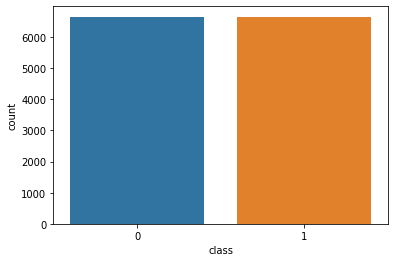

In [63]:
# Revisamos las clases
sns.countplot(bal_data_y)

In [64]:
type(sm_data_X)

pandas.core.frame.DataFrame

In [65]:
type(sm_data_y)

pandas.core.series.Series

### 1.3.1 Random Forest

In [187]:
# Entrenamos un modelo con Random Forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 5, max_depth=5, random_state=0)
clf.fit(bal_data_X, bal_data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [188]:
# Aplicamos validación cruzada para evaluar el performance del modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(clf, bal_data_X, bal_data_y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.02)


In [189]:
# Hacemos predicciones con la data de prueba
predict = clf.predict(X_test)

In [190]:
predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [191]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[ 983,  129],
       [ 265, 1400]], dtype=int64)

In [192]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       0.79      0.88      0.83      1112
           1       0.92      0.84      0.88      1665

    accuracy                           0.86      2777
   macro avg       0.85      0.86      0.85      2777
weighted avg       0.86      0.86      0.86      2777



### 1.3.2 Redes Neuronales

In [72]:
model = keras.Sequential([
    #keras.layers.Dense(len(bal_data_X.columns), activation=tf.nn.relu, input_shape=[len(bal_data_X.columns)]),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(bal_data_X.columns), activation=tf.nn.relu, input_shape=[len(bal_data_X.columns)]),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [73]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [74]:
model.fit(bal_data_X, bal_data_y, epochs=5)

Train on 13314 samples
Epoch 1/5
13314/13314 [==============================] - 6s 452us/sample - loss: 0.2815 - acc: 0.9103
Epoch 2/5
13314/13314 [==============================] - 6s 452us/sample - loss: 0.0793 - acc: 0.9706
Epoch 3/5
13314/13314 [==============================] - 8s 583us/sample - loss: 0.0626 - acc: 0.9784
Epoch 4/5
13314/13314 [==============================] - 7s 526us/sample - loss: 0.0516 - acc: 0.9848
Epoch 5/5
13314/13314 [==============================] - 6s 483us/sample - loss: 0.0433 - acc: 0.9878


In [75]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2368/2777 [========================>.....] - ETA: 0s - loss: 0.1707 - acc: 0.9532777/2777 [==============================] - 1s 199us/sample - loss: 0.1749 - acc: 0.9521
Test accuracy: 0.9521066


In [76]:
predict = model.predict_classes(X_test)

In [80]:
predict

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [135]:
from sklearn.model_selection import KFold
 
n_split=3
 
for train_index,test_index in KFold(n_split).split(bal_data_X, bal_data_y):
  x_train,x_test = bal_data_X[train_index],bal_data_X[test_index]
  y_train1,y_test1 = bal_data_y[train_index],bal_data_y[test_index]
  
  #model=create_model()
  model.fit(x_train, y_train1, epochs=5)
  
  print('Model evaluation ',model.evaluate(x_test,y_test1))

KeyError: "None of [Int64Index([ 4438,  4439,  4440,  4441,  4442,  4443,  4444,  4445,  4446,\n             4447,\n            ...\n            13304, 13305, 13306, 13307, 13308, 13309, 13310, 13311, 13312,\n            13313],\n           dtype='int64', length=8876)] are in the [columns]"

In [77]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[1047,   65],
       [  68, 1597]], dtype=int64)

In [78]:
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       0.94      0.94      0.94      1112
           1       0.96      0.96      0.96      1665

    accuracy                           0.95      2777
   macro avg       0.95      0.95      0.95      2777
weighted avg       0.95      0.95      0.95      2777



### 1.3.3 XG Boost

In [79]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=42,learning_rate=0.01, n_estimators = 5, max_depth=5)
model.fit(bal_data_X, bal_data_y)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [80]:
model.score(X_test,y_test)

1.0

In [81]:
predict = model.predict(X_test)

In [82]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[1112,    0],
       [   0, 1665]], dtype=int64)

In [83]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(model, bal_data_X, bal_data_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.98% (0.02%)


In [84]:
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       1.00      1.00      1.00      1112
           1       1.00      1.00      1.00      1665

    accuracy                           1.00      2777
   macro avg       1.00      1.00      1.00      2777
weighted avg       1.00      1.00      1.00      2777



#### Overfitting, probar otro modelo

### 1.3.4 Regresión Logística

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(bal_data_X, bal_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predict = lr.predict(X_test)

In [87]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[1072,   40],
       [  51, 1614]], dtype=int64)

In [88]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(lr, bal_data_X, bal_data_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 98.02% (0.71%)


In [89]:
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       0.95      0.96      0.96      1112
           1       0.98      0.97      0.97      1665

    accuracy                           0.97      2777
   macro avg       0.97      0.97      0.97      2777
weighted avg       0.97      0.97      0.97      2777



# 2- Clasificación con Selección

## 2.1.1 Selección de Variables

In [54]:
# Revisamos valores nulos
resum_missing(df_dep).head(10)

,Total,Porcentaje
tausw9,0,0.0
MoranAuto_Mutability8,0,0.0
MoranAuto_Mutability25,0,0.0
MoranAuto_Mutability26,0,0.0
MoranAuto_Mutability27,0,0.0
MoranAuto_Mutability28,0,0.0
MoranAuto_Mutability29,0,0.0
MoranAuto_Mutability3,0,0.0
MoranAuto_Mutability30,0,0.0
MoranAuto_Mutability4,0,0.0


In [92]:
bal_data_X.describe()

,num,A,AA,AC,AD,AE,AF,AG,AH,AI,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
count,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,...,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,-0.178023,0.001265,-0.014507,-0.004663,0.014347,0.012347,0.016719,-0.002633,-0.005969,0.000705,...,0.010578,0.011335,0.004952,0.011040,0.019956,-0.004714,0.000432,0.027854,0.018065,0.005683
std,1.005364,0.968659,0.957377,0.972517,1.011846,0.987063,1.007835,0.984675,0.952502,0.964837,...,1.010887,1.017292,0.991851,1.005320,1.000095,0.989553,0.984848,0.992808,0.990168,0.984289
min,-1.731926,-0.863028,-0.296462,-0.148970,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,-1.833369,-0.245378,-1.698984,-1.638773,-1.529407,-1.409979,-1.321731,-1.237456
25%,-1.054157,-0.863028,-0.296462,-0.148970,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,-0.739959,-0.245378,-0.726904,-0.739137,-0.731828,-0.748304,-0.758260,-0.773703
50%,-0.344464,-0.192676,-0.296462,-0.148970,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,-0.155416,-0.245378,-0.127035,-0.175843,-0.166769,-0.123821,-0.137206,-0.178123
75%,0.691111,0.477554,-0.296462,-0.148970,-0.168532,-0.179553,-0.205495,-0.288130,-0.145561,-0.255284,...,-0.306448,-0.281046,0.613331,-0.245378,0.612360,0.592140,0.588233,0.642260,0.602339,0.616462
max,1.731926,9.995793,16.130498,17.857778,20.457451,16.877595,19.191155,13.634235,20.746522,15.401839,...,10.219024,8.902564,4.725582,10.848186,4.778758,4.777545,6.433133,4.590796,4.327463,4.710282


### RFE Random Forest

In [95]:
rf = RandomForestClassifier(n_estimators = 10, max_depth=5, random_state=42)
rf.fit(bal_data_X, bal_data_y)
mask = rf.feature_importances_ > .01
X_reduced = bal_data_X.loc[:, mask]
print(X_reduced.columns)

Index(['num', 'GearyAuto_Mutability5', 'GearyAuto_Mutability6', 'KK', 'M',
       'MoreauBrotoAuto_Mutability7', 'QSOSW12', 'QSOSW13', 'QSOSW17',
       'QSOgrant12', 'QSOgrant13', 'QSOgrant6', 'S', '_ChargeC3',
       '_ChargeD3050', '_ChargeT12', '_HydrophobicityD2001',
       '_HydrophobicityD3001', '_PolarityC3', '_PolarityD1001',
       '_PolarizabilityD3025', '_SecondaryStrD1001', '_SecondaryStrD2025',
       '_SecondaryStrD3001', '_SolventAccessibilityC1',
       '_SolventAccessibilityD1025', '_SolventAccessibilityD3001',
       '_SolventAccessibilityD3100', '_SolventAccessibilityT23',
       'isoelectric_point'],
      dtype='object')


In [96]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(n_estimators = 5, max_depth=5, random_state=42), n_features_to_select=20, verbose=0)
rfe.fit(bal_data_X, bal_data_y)

mator with 563 features.
Fitting estimator with 562 features.
Fitting estimator with 561 features.
Fitting estimator with 560 features.
Fitting estimator with 559 features.
Fitting estimator with 558 features.
Fitting estimator with 557 features.
Fitting estimator with 556 features.
Fitting estimator with 555 features.
Fitting estimator with 554 features.
Fitting estimator with 553 features.
Fitting estimator with 552 features.
Fitting estimator with 551 features.
Fitting estimator with 550 features.
Fitting estimator with 549 features.
Fitting estimator with 548 features.
Fitting estimator with 547 features.
Fitting estimator with 546 features.
Fitting estimator with 545 features.
Fitting estimator with 544 features.
Fitting estimator with 543 features.
Fitting estimator with 542 features.
Fitting estimator with 541 features.
Fitting estimator with 540 features.
Fitting estimator with 539 features.
Fitting estimator with 538 features.
Fitting estimator with 537 features.
Fitting estim

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=5, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=1)

In [97]:
print(bal_data_X.columns[rfe.support_])

Index(['_NormalizedVDWVD3001', '_NormalizedVDWVD3025', '_PolarityC1',
       '_PolarityD1001', '_PolarityD1025', '_PolarityD3025', '_PolarityD3100',
       '_PolarityT12', '_PolarizabilityC1', '_PolarizabilityD1001',
       '_PolarizabilityD3001', '_PolarizabilityD3025', '_SecondaryStrC3',
       '_SecondaryStrD1001', '_SecondaryStrD1025', '_SecondaryStrD2001',
       '_SolventAccessibilityC3', '_SolventAccessibilityD1001',
       '_SolventAccessibilityD3001', 'charge'],
      dtype='object')


## 2.1.2 Extracción de Variables

In [100]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(scaled_df)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
print(pca.explained_variance_ratio_)

[1.20047620e-01 3.04678711e-02 2.52701438e-02 ... 7.45319666e-34
 7.45319666e-34 7.45319666e-34]


In [106]:
print(pca.explained_variance_ratio_.cumsum())

[0.12004762 0.15051549 0.17578564 ... 1.         1.         1.        ]


### Miramos el número de componentes que explican la varianza

In [153]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

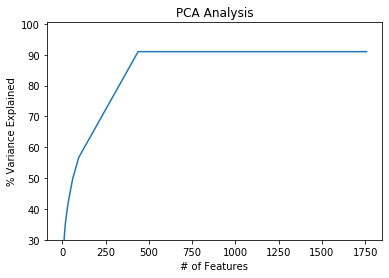

In [154]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

## 2.1.3 Peso de la Evidencia y valor de la información

In [252]:
# Seleccionamos las variables mas importantes a partir de votos de modelos
vs = VotingSelector()

vs.fit(bal_data_X, bal_data_y)

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=879,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [253]:
delta_crit = 4
priorizadas = vs.feature_votes_[vs.feature_votes_["Votes"]>delta_crit]["Variable_Name"].values
print("Estas son las variables más importantes, según el consenso de votos de selección,", \
      delta_crit+1," donde las columnas de interes son:",\
      priorizadas)

Estas son las variables más importantes, según el consenso de votos de selección, 5  donde las columnas de interes son: ['M' '_PolarizabilityT12' 'GearyAuto_ResidueASA2' '_NormalizedVDWVD2050'
 '_PolarizabilityD2001' 'embed_0_50' 'GearyAuto_ResidueVol9' 'embed_1_41'
 'embed_0_29' 'embed_0_62' 'GearyAuto_FreeEnergy16' 'QSOSW16' 'embed_0_40'
 'GearyAuto_FreeEnergy15' 'embed_0_94' '_ChargeD1025' 'N'
 'MoreauBrotoAuto_Mutability10' 'GearyAuto_FreeEnergy2'
 'MoranAuto_Hydrophobicity11' 'GearyAuto_ResidueASA1' 'embed_2_25'
 'QSOgrant21' 'embed_0_49' 'QSOSW21' 'embed_2_82' 'QSOgrant24' 'QSOSW24'
 'embed_2_22' 'Y' 'GearyAuto_FreeEnergy5' 'embed_2_42' 'embed_0_93'
 'embed_2_94' '_NormalizedVDWVD1100' 'embed_1_65' 'C' 'embed_1_49'
 'QSOSW3' 'QSOgrant3' '_HydrophobicityC1' 'QSOgrant19' 'QSOSW19'
 '_HydrophobicityD3025' '_PolarizabilityC1' '_SolventAccessibilityD1050'
 'embed_1_62' 'R' '_PolarityD2025' 'GearyAuto_Hydrophobicity15'
 '_SecondaryStrD2025' 'embed_2_57' 'embed_1_57' 'embed_2_26' 'embed

## 2.2 Entrenar con las caracteristicas seleccionadas

In [254]:
#file_= glob.glob('Datos/val/DatosValidacion1.csv')
val_data = pd.read_csv('Datos/val/DatosValidacion1.csv')
val_data.pop("sequence")
y2 = val_data.pop("class")
val_data.head()

,Unnamed: 0,Unnamed: 0.1,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,...,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99
0,0,0,33,3897.77,8.691,0.002230,11.404358,-0.112121,84.766667,0.030303,...,-0.928374,2.771416,-0.851930,-0.459909,0.909622,1.402783,-3.848056,-0.528822,-0.740751,-0.257650
1,1,1,34,4003.64,7.590,0.001896,10.196106,-0.638235,76.035294,0.117647,...,-1.030314,2.356963,-0.590644,-0.433246,0.362768,1.204798,-3.838024,-0.859893,-1.086264,0.052278
2,2,2,35,4121.92,6.689,0.001623,9.611023,-0.551429,16.851429,0.057143,...,-0.846578,2.762231,-1.182640,-0.908285,0.802487,1.546229,-4.543212,-0.786475,-0.477468,-0.178319
3,3,3,31,3838.56,6.589,0.001717,9.802917,-0.200000,53.977419,0.161290,...,-0.960986,1.742604,-0.981736,-0.098695,0.614634,0.774174,-2.818301,-0.395545,-0.738405,0.369630
4,4,4,33,3715.45,3.591,0.000967,8.981384,0.660606,62.042424,0.090909,...,-1.034936,1.734715,-0.830263,-0.386610,0.836167,0.859871,-3.665342,-0.922017,-0.364447,-0.055827


In [255]:
# Normalizamos el set de datos
names = val_data.columns
scaler = preprocessing.StandardScaler()
scaled_val_data = scaler.fit_transform(val_data)
scaled_val_data  = pd.DataFrame(scaled_val_data, columns=names)
scaled_val_data.head()

,Unnamed: 0,Unnamed: 0.1,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,...,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99
0,-1.704958,-1.710290,1.200441,1.488957,2.993163,2.041380,1.680420,0.057637,1.795329,-0.751363,...,-0.709365,1.945619,-1.703364,0.675871,1.054814,3.373537,-2.357323,0.456880,-0.985170,-1.610517
1,-1.703898,-1.709234,1.346667,1.627166,2.600490,1.720552,1.201197,-0.688985,1.474132,0.681090,...,-0.996886,1.241833,-0.840013,0.748034,-0.608378,2.709067,-2.344236,-0.497817,-2.046474,-0.469698
2,-1.702838,-1.708178,1.492893,1.781575,2.279148,1.458301,0.969138,-0.565795,-0.703036,-0.311187,...,-0.478661,1.930022,-2.796106,-0.537628,0.728976,3.854966,-3.264137,-0.286104,-0.176447,-1.318507
3,-1.701777,-1.707123,0.907989,1.411661,2.243483,1.548356,1.045248,-0.067074,0.662700,1.396846,...,-0.801345,0.198585,-2.132271,1.653474,0.157642,1.263816,-1.014032,0.841203,-0.977964,0.698452
4,-1.700717,-1.706067,1.200441,1.250947,1.174245,0.827828,0.719407,1.154235,0.959383,0.242584,...,-1.009921,0.185188,-1.631771,0.874250,0.831410,1.551430,-2.118977,-0.676961,0.170717,-0.867622


In [256]:
data_val_x = scaled_val_data[priorizadas]
data_val_y = y2

KeyError: "['num'] not in index"

## 2.2.1 Random Forest (Validación)

In [ ]:
# Entrenamos un modelo con Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, max_depth=5, random_state=42)
rf.fit(bal_data_X[priorizadas], bal_data_y)

In [ ]:
# Aplicamos validación cruzada para evaluar el performance del modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(rf, bal_data_X[priorizadas], bal_data_y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
# Hacemos predicciones con la data de prueba
predict = rf.predict(data_val_x)

In [ ]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(data_val_y, predict)

In [ ]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(data_val_y, predict))

## 2.2.2 Redes Neuronales (Validación)

In [ ]:
n_net = keras.Sequential([
    #keras.layers.Dense(len(bal_data_X.columns), activation=tf.nn.relu, input_shape=[len(bal_data_X.columns)]),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(bal_data_X[priorizadas].columns), activation=tf.nn.relu, input_shape=[len(bal_data_X[priorizadas].columns)]),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
n_net.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
n_net.fit(bal_data_X[priorizadas], bal_data_y, epochs=5)

In [ ]:
predict = n_net.predict_classes(data_val_x)

In [ ]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(data_val_y, predict)

In [ ]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(data_val_y, predict))

## Regresión Logística

In [ ]:
lr = LogisticRegression()
lr.fit(bal_data_X[priorizadas], bal_data_y)

In [ ]:
predict = lr.predict(data_val_x)

In [ ]:
# Revisamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(data_val_y, predict)

In [ ]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(data_val_y, predict))